In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Loading the dataset
df = pd.read_csv("MSFT.csv")

In [5]:
#showing the first 5 rows of dataset
df.head()

,date,open,high,low,close,adj_close,volume
0,1986-03-13 00:00:00-05:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800
1,1986-03-14 00:00:00-05:00,0.097222,0.102431,0.097222,0.100694,0.061839,308160000
2,1986-03-17 00:00:00-05:00,0.100694,0.103299,0.100694,0.102431,0.062906,133171200
3,1986-03-18 00:00:00-05:00,0.102431,0.103299,0.098958,0.099826,0.061306,67766400
4,1986-03-19 00:00:00-05:00,0.099826,0.100694,0.097222,0.098090,0.060240,47894400


In [7]:
#Converting the date column into datetime
df['date'] = pd.to_datetime(df['date'] , utc= True)

In [8]:
#Reseting the index
df = df.reset_index(drop=True)

In [9]:
#Checking if there is any missing values
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [11]:
#Selecting only the required columns from dataset for train test splitting
data = df[['open','high','low','close','volume']]


In [12]:
#train test spliting
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [13]:
#importing MinMaxScaler for scaling
from sklearn.preprocessing import MinMaxScaler 

In [14]:
#loading scaler
scaler = MinMaxScaler()


In [15]:
#Only using fit in train data
train_scaler = scaler.fit_transform(train_data)

In [16]:
#Using transform in test data
test_scaler = scaler.transform(test_data)

In [49]:
#Time series sequence
#using the function that make sequences
def create_seq(dataset , lookback) :
    X =[]
    Y =[]
    for i in range(len(dataset) - lookback) :
        X.append(dataset[i : i + lookback])
        Y.append(dataset[i + lookback, [3]])
    return np.array(X) , np.array(Y)
# here we made sequences to prepare data for predicting next day close price

In [50]:
#lookback window
lookback = 30
X_train , Y_train = create_seq(train_scaler , lookback)
X_test , Y_test = create_seq(test_scaler , lookback)

In [51]:
#Create sequences for train and test data
X_train.shape , Y_train.shape

((7844, 30, 5), (7844, 1))

In [21]:
#LSTM model
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense

In [22]:
#Loading the model
model = Sequential()

In [24]:
model.add(LSTM(50 , input_shape=(X_train.shape[1] , X_train.shape[2])))
model.add(Dense(1))

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
#Compiling model
model.compile(optimizer = 'adam' , loss = 'mse')

In [26]:
#Showing model architecture summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#Traing 1 layer ISTM
history_istm = model.fit( X_train , Y_train , epochs = 50 , batch_size = 32 , validation_split = 0.2 , verbose = 1)

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 9.8694e-05 - val_loss: 3.1235e-04
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 1.0241e-04 - val_loss: 2.6974e-04
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 9.7478e-05 - val_loss: 1.3733e-04
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 8.7524e-05 - val_loss: 2.9334e-04
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 9.3692e-05 - val_loss: 1.2375e-04
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 8.9641e-05 - val_loss: 1.3815e-04
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 8.1609e-05 - val_loss: 3.3935e-04
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 9.0385e-05 - val_loss: 1.0386e-04
Epoch 9/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 8.0667e-05 - val_loss: 1.2925e-04
Epoch 10/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 7.6711e-05 - val_loss: 1.2574e-04
Epoch 11/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/

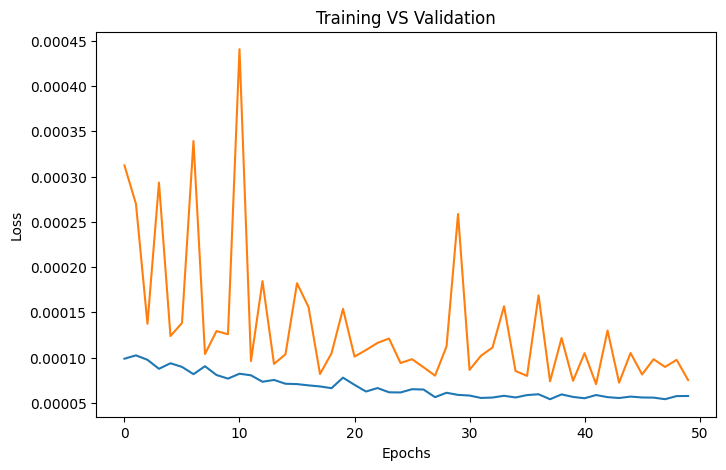

In [57]:
#Graph plotting to show loss 1 layer
plt.figure(figsize=(8,5))
plt.plot(history_istm.history['loss'], label = 'Training Loss')
plt.plot(history_istm.history['val_loss'], label = 'Validation Loss')
plt.title("Training VS Validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [58]:
#Predicting
#Importing libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test , y_pred)) #Mean_squared_error
print("1st layer LSTM RMSE :" , rmse)

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
1st layer LSTM RMSE : 0.7558483430305487


In [60]:
mae = mean_absolute_error = mean_absolute_error(Y_test , y_pred)
print("1st layer LSTM MAE:" , mae)

1st layer LSTM MAE: 0.5405842353203267


In [63]:
#LSTM 2 layer
stacked_model = Sequential()
stacked_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
stacked_model.add(LSTM(50))  # second layer
stacked_model.add(Dense(1))
stacked_model.compile(optimizer='adam', loss='mse') #Compiling the model

In [64]:
#Train
history_stacked = stacked_model.fit( X_train , Y_train, epochs = 50 , batch_size = 32 , validation_split = 0.2 , verbose = 1)

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 2.3566e-04 - val_loss: 6.9789e-04
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 1.9721e-04 - val_loss: 3.7787e-04
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.8036e-04 - val_loss: 4.4393e-04
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 1.5135e-04 - val_loss: 4.7475e-04
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 1.3561e-04 - val_loss: 3.2088e-04
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 1.3625e-04 - val_loss: 6.0464e-04
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 1.2562e-04 - val_loss: 4.6759e-04
Epoch 9/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 1.1516e-04 - val_loss: 1.9950e-04
Epoch 10/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 1.0845e-04 - val_loss: 2.7699e-04
Epoch 11/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms

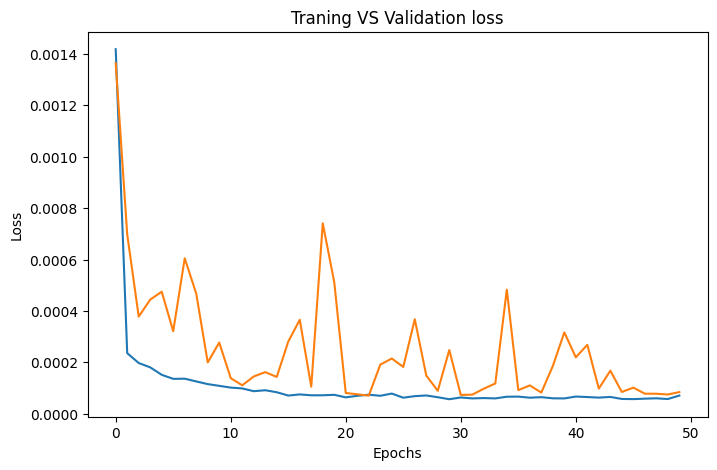

In [65]:
#Graph to show loss
plt.figure(figsize=(8,5))
plt.plot(history_stacked.history['loss'], label = 'Training Loss')
plt.plot(history_stacked.history['val_loss'], label = 'Validation Loss')
plt.title("Traning VS Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()